<a href="https://colab.research.google.com/github/vigneshsharma1997/Assignments/blob/main/Bias_Variance_tradeoff_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [5]:
url = 'https://raw.githubusercontent.com/vigneshsharma1997/Assignments/main/housing.csv'
df = pd.read_csv(url)

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [22]:
dependent_variable = 'MEDV'
independent_variable = list(set(df.columns.tolist()) - {dependent_variable})

In [23]:
independent_variable

['RAD',
 'AGE',
 'CRIM',
 'ZN',
 'LSTAT',
 'RM',
 'CHAS',
 'NOX',
 'PTRATIO',
 'TAX',
 'B',
 'DIS',
 'INDUS']

In [24]:
dependent_variable

'MEDV'

In [25]:
x = df[independent_variable].values
y = df[dependent_variable].values

In [17]:
poly = PolynomialFeatures(degree= 4)
x_poly = poly.fit_transform(x)
poly.fit(x_poly,y)

poly.fit(x_poly,y)
regressor = LinearRegression()
regressor.fit(x_poly,y)

LinearRegression()

ValueError: ignored

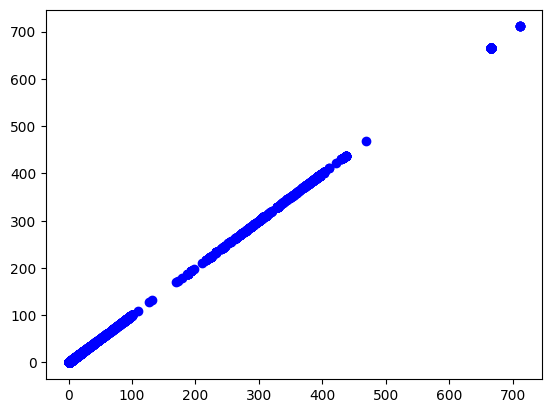

In [31]:
#Visualize the linear regression Results

plt.scatter(df[independent_variable],df[independent_variable],color='blue')
plt.plot(x,regressor.predict(x),color='red')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()


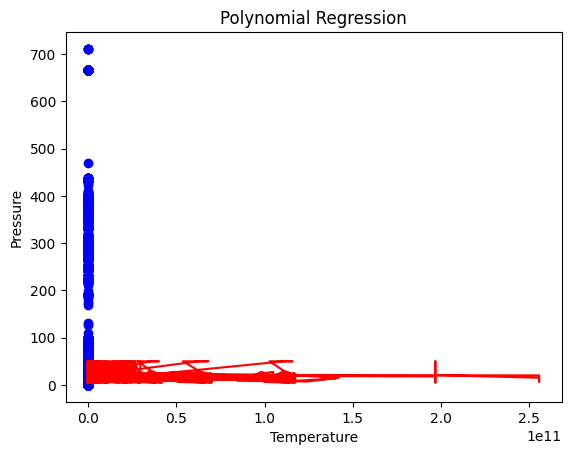

In [33]:
# Visualising the Polynomial Regression results
plt.scatter(df[independent_variable],df[independent_variable],color='blue')
  
plt.plot(x_poly, regressor.predict(x_poly), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
  
plt.show()

In [47]:
def create_polynomial_regression_model():
  "Creates a polynomial regression model for the given degree"
  fig, axs = plt.subplots(5, 3,figsize=(15, 30))
  # j and k is for iterating through axis in subplot
  j=0
  k=-1
  #iterating through each feature variable in data set
  for i in independent_variable:
    #setting title for plot
    title=i

    #Create the independent variable data
    x = df[i].values
    #reshaping it
    x = np.array(x).reshape((len(x), 1))

    # Create the dependent variable data
    y = df[dependent_variable].values

    y = np.array

    #splitting data into train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

    degree=1

    train_error_list=[] #store training error for each degree 
    test_error_list=[] #store testing error for each degree
    degree_list=[1,2,3,4,5,6,7,8,9,10] #storing all the degrees

    #iterating through each degree
    while degree<=10:
      poly_features = PolynomialFeatures(degree=degree)

      #tranfsorms the fratures to higher degree:
      x_train_poly = poly_features.fit_transform(x_train)

      #Fit the transformed features to Linear Regression
      poly_model = LinearRegression()
      poly_model.fit(x_train_poly,y_train)

      #Predicting Training data - set
      y_train_predicted = poly_model.predict(x_train_poly)

      #Predicting on Test Data - set
      y_test_predicted = poly_model.predict(poly_features.fit_transform(x_test))

      #Evaluating the model on training data set
      rmse_test = np.sqrt(mean_squared_error(y_train,y_train_predicted))
      test_error_list.append(rmse_test)
      degree+=1

# Updating j and k for plotting on subplot  
    k+=1
    if k>2:
      k=0
      j+=1
    axs[j,k].plot(degree_list,train_error_list,color='green',label='Train_Error')
    axs[j,k].plot(degree_list,test_error_list,color='red',linestyle='--',linewidth=1.0,label='Test_Error')
    axs[j,k].set_title(title)
    axs[j,k].legend()
  for ax in axs.flat:
    ax.set(xlabel='Model Complexity', ylabel='RMSE')


ValueError: ignored

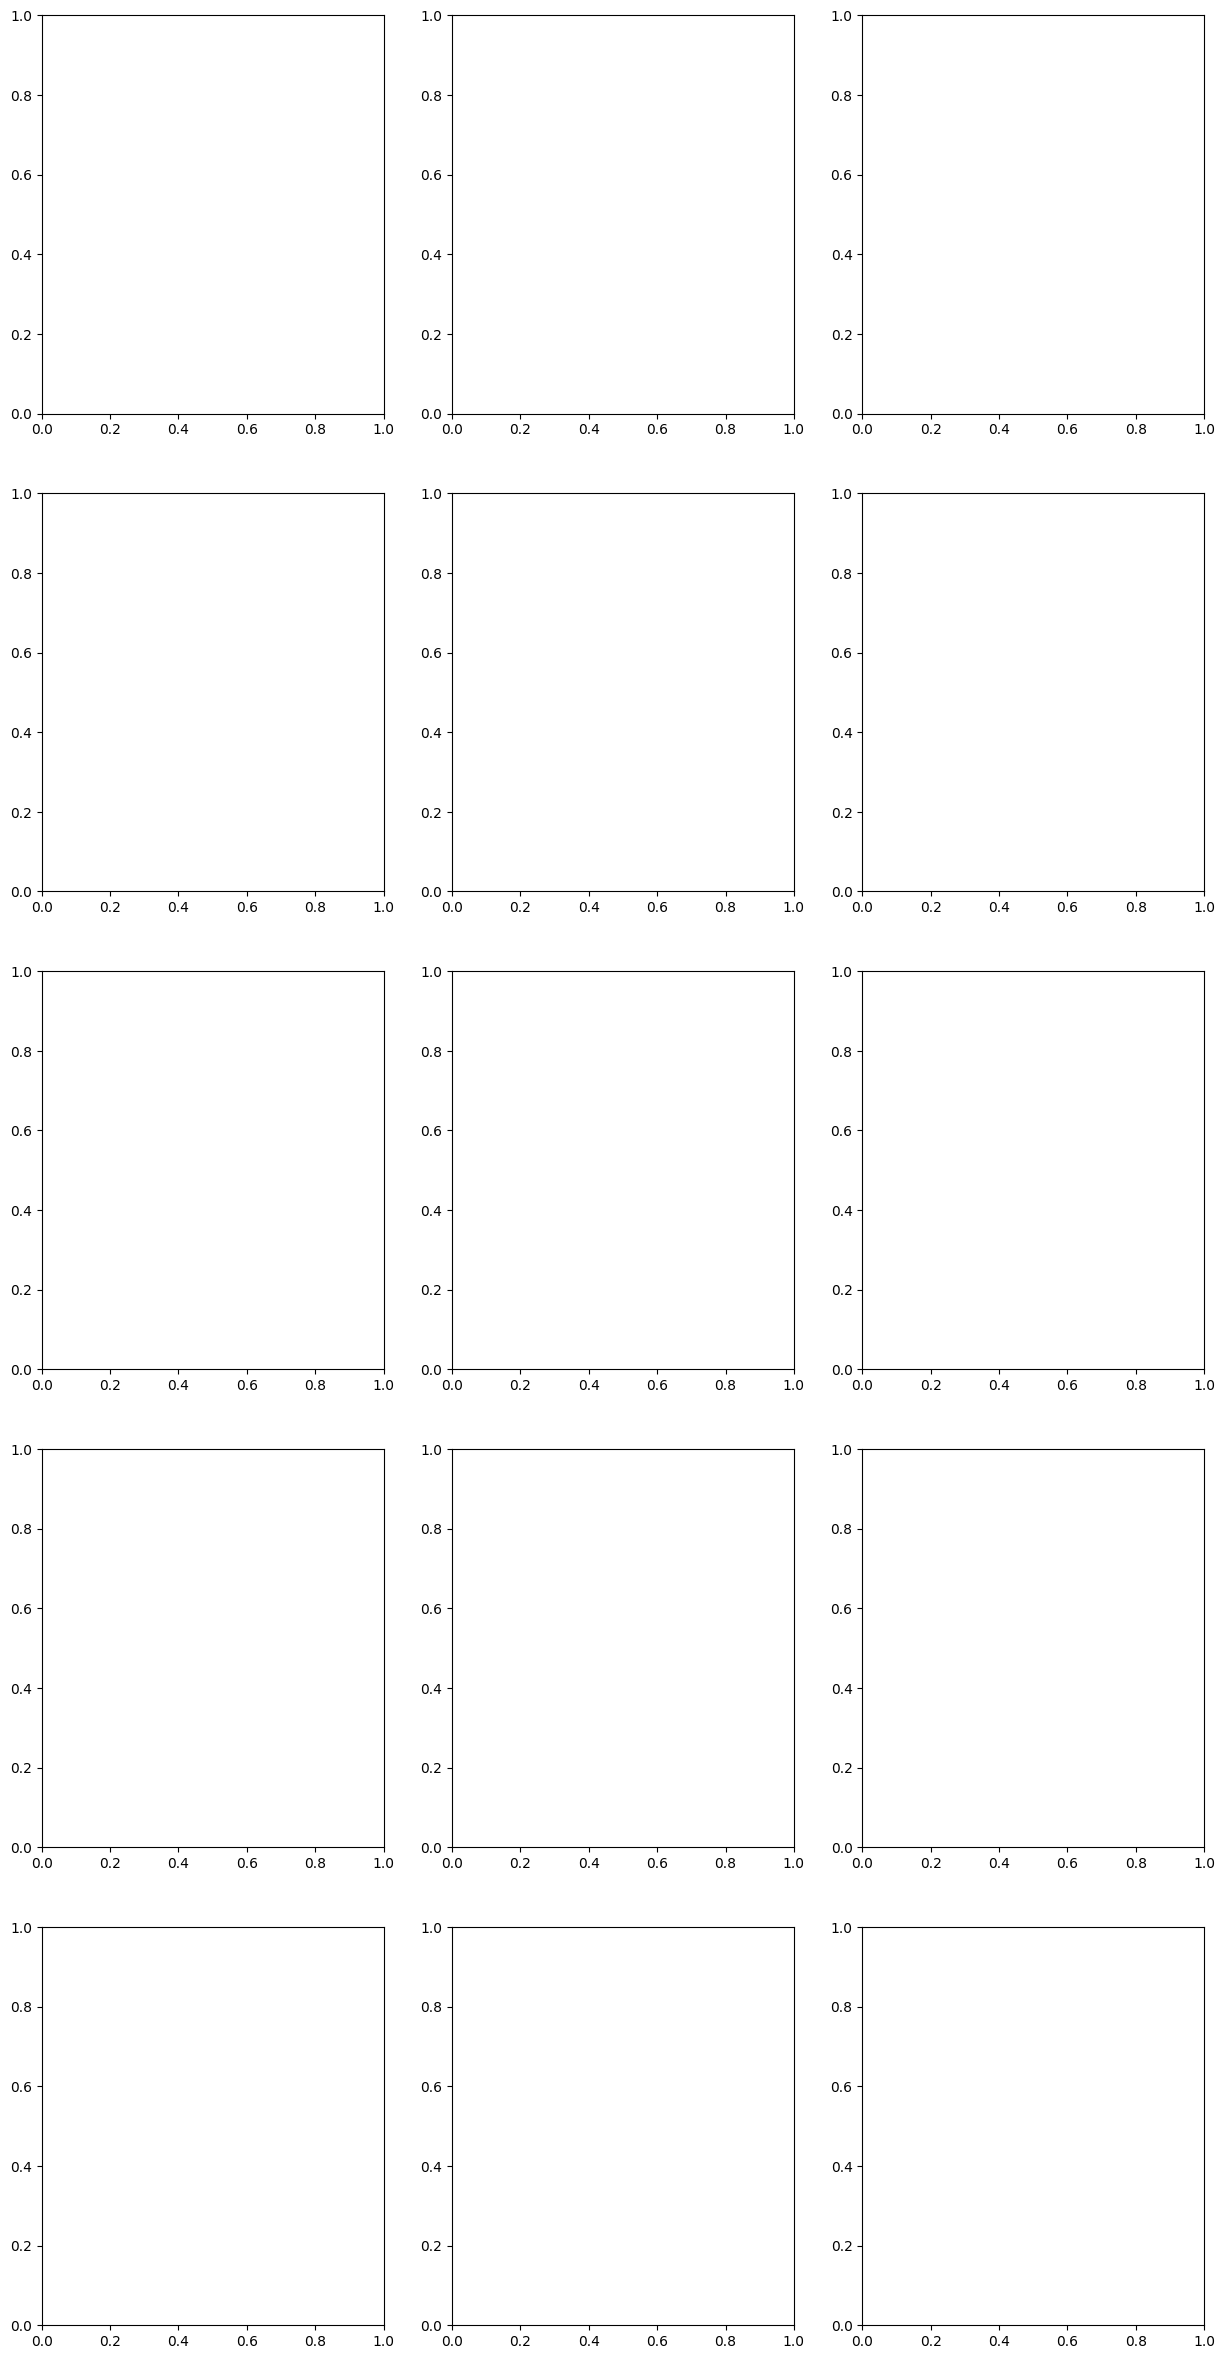

In [48]:
create_polynomial_regression_model()